# <b> Exploratory Data Analysis on Quran Dataset</b>

<h3> About Holy Quran: </h3>
The Holy Quran is the central text for 1.5 billion Muslims around the world. It literally means "The Recitation." It is undoubtedly the finest work in Arabic literature and revealed by Allah (God) to His Messenger Prophet Muhammed (Peace Be Upon Him) through angel Gabriel. It was revealed verbally from December 22, 609 (AD) to 632 AD (when Prophet Muhammed (Peace Be Upon Him) died)

The book is divided into 30 parts, 114 Chapters and 6,000+ verses.

# Importing Libraries

In [1]:
!pip install seaborn
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re

# Loading and understanding dataset

In [ ]:
quran_english = pd.read_csv('datasets/en.yusufali.csv')

quran_english

,Surah,Ayah,Text
0,1,1,"In the name of Allah, Most Gracious, Most Merc..."
1,1,2,"Praise be to Allah, the Cherisher and Sustaine..."
2,1,3,"Most Gracious, Most Merciful;"
3,1,4,Master of the Day of Judgment.
4,1,5,"Thee do we worship, and Thine aid we seek."
...,...,...,...
6231,114,2,"The King (or Ruler) of Mankind,"
6232,114,3,"The god (or judge) of Mankind,-"
6233,114,4,"From the mischief of the Whisperer (of Evil), ..."
6234,114,5,(The same) who whispers into the hearts of Man...


In [4]:
quran_english.shape

(6236, 3)

<li>The Quran has 6,236 verses, not including Bismillah.
<li> 6,348 verses including Bismillah.
<li>The Quran is divided into 114 chapters, called surahs, and each surah is divided into a number of verses, called ayat

In [5]:
quran_english[quran_english['Text'].str.contains('In the name of Allah, Most Gracious, Most Merciful')]

,Surah,Ayah,Text
0,1,1,"In the name of Allah, Most Gracious, Most Merc..."
3188,27,30,"""It is from Solomon, and is (as follows): 'In ..."


<li>"Bismillah al-Rahman al-Rahim" means "In the name of Allah, Most Gracious, Most Merciful"
<li>There is a surah which has verse containing "Bismillah" i.e Verse 30 in Chapter 27

In [6]:
# Checking for null values if any to make sure the dataset is error free.
quran_english.isna().sum()

Surah    0
Ayah     0
Text     0
dtype: int64

In [ ]:
# Importing surah names file which I have made
surah_names = pd.read_csv('datasets/surah_names_english.csv', names=['Surah', 'Surah Name'])

# Removing white space in the beginning of names
surah_names["Surah Name"] = surah_names["Surah Name"].str[1:]

surah_names


,Surah,Surah Name
0,1,Al-Fatihah (the Opening)
1,2,Al-Baqarah (the Cow)
2,3,Aali Imran (the Family of Imran)
3,4,An-Nisa’ (the Women)
4,5,Al-Ma’idah (the Table)
...,...,...
109,110,An-Nasr (the Help)
110,111,Al-Masad (the Palm Fiber)
111,112,Al-Ikhlas (the Sincerity)
112,113,Al-Falaq (the Daybreak)


In [8]:
# Merging surah names dataframe with quran dataframe on Surah no.
quran_english_with_surah = quran_english.merge(surah_names, on='Surah')
quran_english_with_surah.index = np.arange(1,6236+1)

quran_english_with_surah

,Surah,Ayah,Text,Surah Name
1,1,1,"In the name of Allah, Most Gracious, Most Merc...",Al-Fatihah (the Opening)
2,1,2,"Praise be to Allah, the Cherisher and Sustaine...",Al-Fatihah (the Opening)
3,1,3,"Most Gracious, Most Merciful;",Al-Fatihah (the Opening)
4,1,4,Master of the Day of Judgment.,Al-Fatihah (the Opening)
5,1,5,"Thee do we worship, and Thine aid we seek.",Al-Fatihah (the Opening)
...,...,...,...,...
6232,114,2,"The King (or Ruler) of Mankind,",An-Nas (Mankind)
6233,114,3,"The god (or judge) of Mankind,-",An-Nas (Mankind)
6234,114,4,"From the mischief of the Whisperer (of Evil), ...",An-Nas (Mankind)
6235,114,5,(The same) who whispers into the hearts of Man...,An-Nas (Mankind)


# <b>Performing EDA to find answers and useful insights and facts from<br>Al-Quran

# Numbers of verses in each chapter.

In [9]:
quran_english_with_surah["Surah Name"].value_counts()

Surah Name
Al-Baqarah (the Cow)                   286
Ash-Shu’ara’ (the Poets)               227
Al-A’raf (the Heights)                 206
Aali Imran (the Family of Imran)       200
As-Saffah (Those Ranges in Ranks)      182
                                      ... 
Quraish (Quraish)                        4
Al-Ikhlas (the Sincerity)                4
Al-‘Asr (the Time)                       3
Al-Kauthar (the River of Abundance)      3
An-Nasr (the Help)                       3
Name: count, Length: 114, dtype: int64

In [10]:
# Splitting quran dataset into 3 parts

# From Chapter 1 - 39
surah_1_39 = quran_english_with_surah[quran_english_with_surah['Surah'] < 40] 

# From Chapter 40 - 79
surah_40_79 = quran_english_with_surah[(quran_english_with_surah['Surah'] > 39) & (quran_english_with_surah['Surah'] < 80)]

# From Chapter 80 - 144
surah_80_114 = quran_english_with_surah[quran_english_with_surah['Surah'] > 79]

In [11]:
surah_1_39

,Surah,Ayah,Text,Surah Name
1,1,1,"In the name of Allah, Most Gracious, Most Merc...",Al-Fatihah (the Opening)
2,1,2,"Praise be to Allah, the Cherisher and Sustaine...",Al-Fatihah (the Opening)
3,1,3,"Most Gracious, Most Merciful;",Al-Fatihah (the Opening)
4,1,4,Master of the Day of Judgment.,Al-Fatihah (the Opening)
5,1,5,"Thee do we worship, and Thine aid we seek.",Al-Fatihah (the Opening)
...,...,...,...,...
4129,39,71,The Unbelievers will be led to Hell in crowd: ...,Az-Zumar (the Groups)
4130,39,72,"(To them) will be said: ""Enter ye the gates of...",Az-Zumar (the Groups)
4131,39,73,And those who feared their Lord will be led to...,Az-Zumar (the Groups)
4132,39,74,"They will say: ""Praise be to Allah, Who has tr...",Az-Zumar (the Groups)


### Plotting all Surah with their verses count

In [12]:
# Function for making and displaying a count plot
def quran_chapters_verses_countplot(dataframe, y_axis, title):
    # Setting figures size and theme
    plt.figure(figsize=(6,10))
    sns.set_style('darkgrid')

    # Countplot to count the number of verses of each chapter and plot
    ax = sns.countplot(data=dataframe, y=y_axis, palette='viridis')

    # Setting labels for each bar
    for container in ax.containers:
        ax.bar_label(container, size=10, padding=2)

    # Customizing plot
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.set_ylabel('Chapters (Surahs)', fontweight='bold')
    ax.set_xlabel('Verses', fontweight='bold')
    ax.set_xticks([0,50,100,150,200,250,300])
        
    plt.show()

/var/folders/d_/803l9l6d6ts252dblcg86snh0000gp/T/ipykernel_29533/1389847968.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataframe, y=y_axis, palette='viridis')


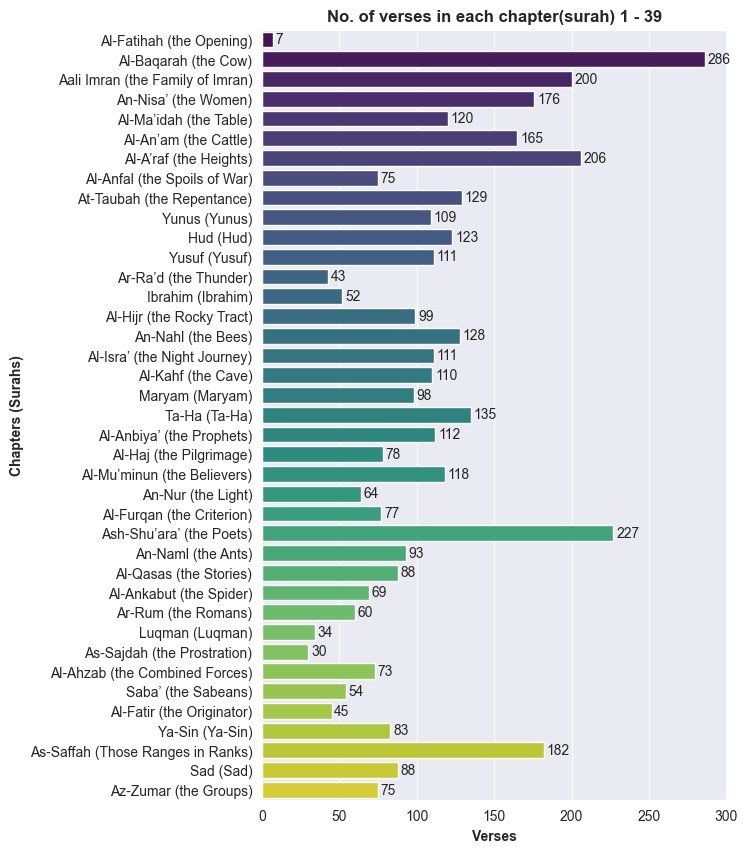

In [13]:
quran_chapters_verses_countplot(surah_1_39, 'Surah Name', 'No. of verses in each chapter(surah) 1 - 39')

/var/folders/d_/803l9l6d6ts252dblcg86snh0000gp/T/ipykernel_29533/1389847968.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataframe, y=y_axis, palette='viridis')


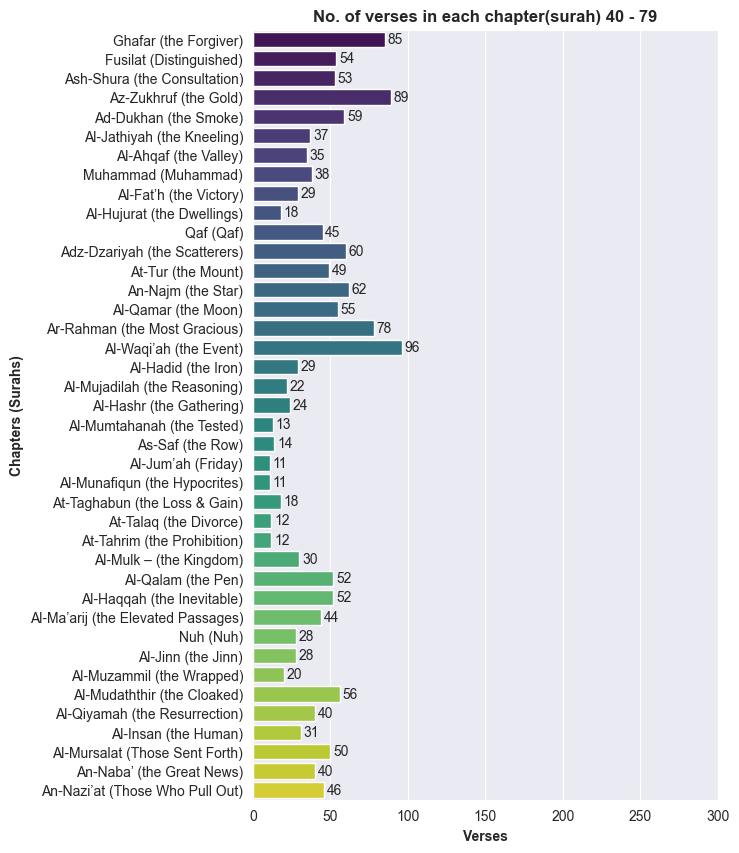

In [14]:
quran_chapters_verses_countplot(surah_40_79, 'Surah Name', 'No. of verses in each chapter(surah) 40 - 79')

/var/folders/d_/803l9l6d6ts252dblcg86snh0000gp/T/ipykernel_29533/1389847968.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataframe, y=y_axis, palette='viridis')


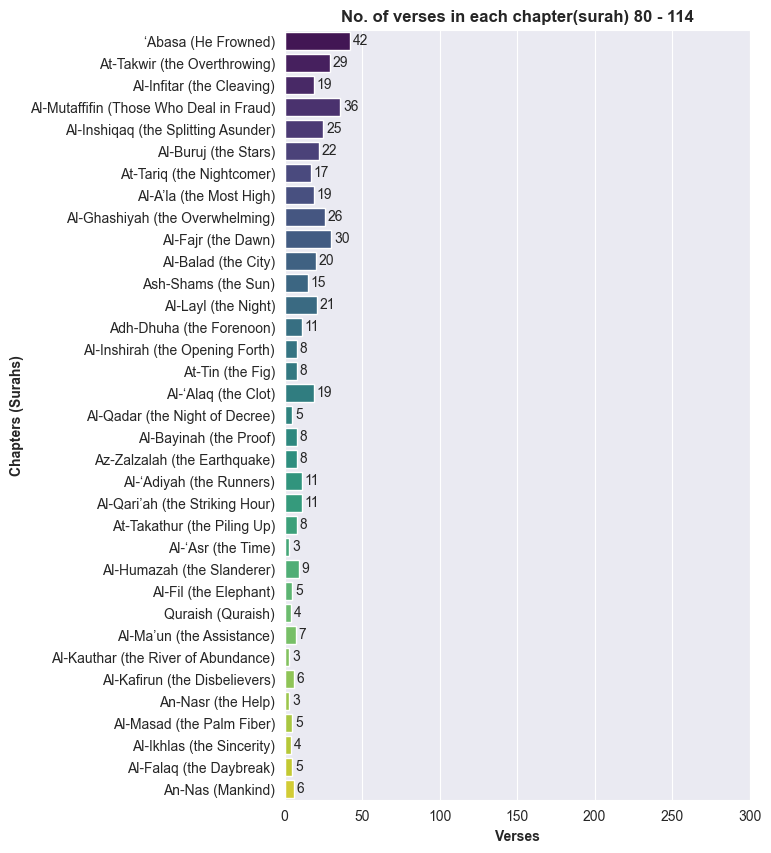

In [15]:
quran_chapters_verses_countplot(surah_80_114, 'Surah Name', 'No. of verses in each chapter(surah) 80 - 114')

<li> Al-Baqarah is the lengthiest chapter.
<li> Al-Asr, Al-Kauthar and Al-Nasr are the shortest chapters with 3 verses only.

# Prophets name's frequency 

In [16]:
# List of all the prophets mentioned in the Quran
prophet_names = [ "Isma'il", 'Elisha', 'Zul-Kifl', 'Jesus', 'Moses', "Shu'aib", 'Jacob', 'Lut',
                 'Joseph', 'Isaac', 'Job', 'Aaron', 'Abraham', 'Noah', 'Adam', 'Hud', 'Solomon', 
                 'David', 'Zakariya', 'Yahya', 'Elias', 'Jonah', 'Idris', 'Salih', 'Muhammad']

# Making a empty dicitonary
prophet_names_freq = {}

# Initializing with all prophet names as key and 0 value(i.e count)
for prophet in prophet_names:
    prophet_names_freq[prophet.lower()] = 0
    
# Code for counting prophet names, start by looping in Quran dataframe
for lab,row in quran_english.iterrows():
    
    # Extract each verse and split the words and store in a list
    ayah_word_list = row['Text'].split(' ') 
    
    # Loop through verse list to access each word
    for word in ayah_word_list:
        # Lower casing the word and remove any special characters from it through RE
        word = word.lower()
        pattern = re.compile('[^a-zA-Z-\']') 
        word = pattern.sub('', word) 
        
        # If the word is present in prophet names dict then increase count value
        if word in prophet_names_freq:
            prophet_names_freq[word] += 1

# Making a dataframe with the prophets dictionary           
prophet_names_df = pd.DataFrame({ 'Name' : list(prophet_names_freq.keys()),
                                  'Frequency' : list(prophet_names_freq.values())})

prophet_names_df['Name'] = prophet_names_df['Name'].apply(str.capitalize)

prophet_names_df.sort_values('Frequency', ascending=False, inplace=True)

/var/folders/d_/803l9l6d6ts252dblcg86snh0000gp/T/ipykernel_29533/135347167.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=prophet_names_df, x='Name', y='Frequency',palette='husl')


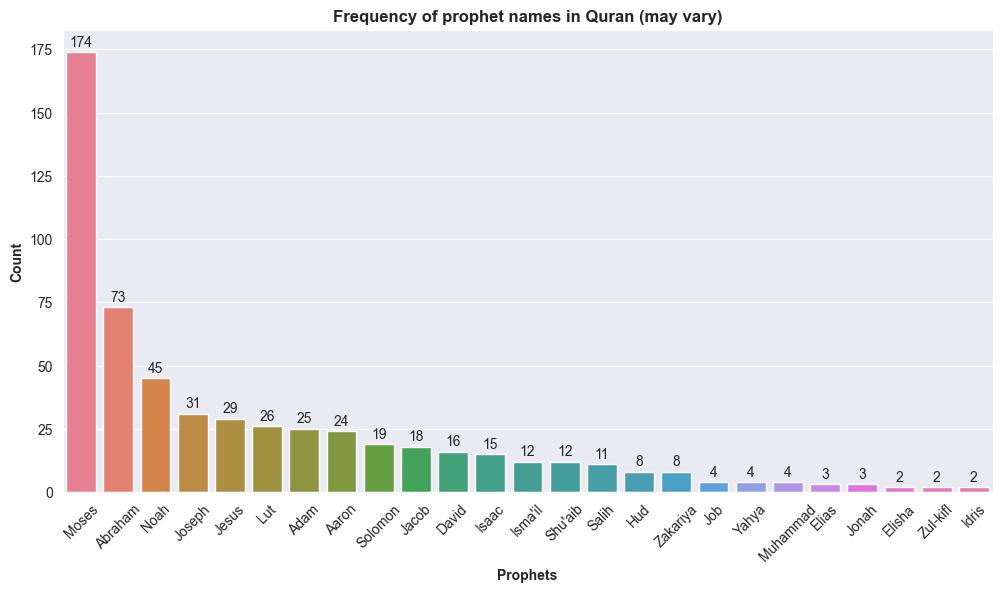

In [17]:
# Plotting the graph
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
ax = sns.barplot(data=prophet_names_df, x='Name', y='Frequency',palette='husl')

for container in ax.containers:
    ax.bar_label(container, size=10, padding=2)
    
ax.set_title("Frequency of prophet names in Quran (may vary)", fontweight='bold', fontsize=12)
ax.set_ylabel("Count", fontweight='bold')
ax.set_xlabel("Prophets", fontweight='bold')
ax.tick_params('x', rotation=45)
    
plt.show()

<li> Moses (Musa A.S) is mentioned the most in Quran followed by Abraham, Noah and Joseph(Yusuf) A.S.
<li> These frequencies may vary from translation to translation of differents languages and Mufasirs.

# Word cloud of Quran and different chapters.

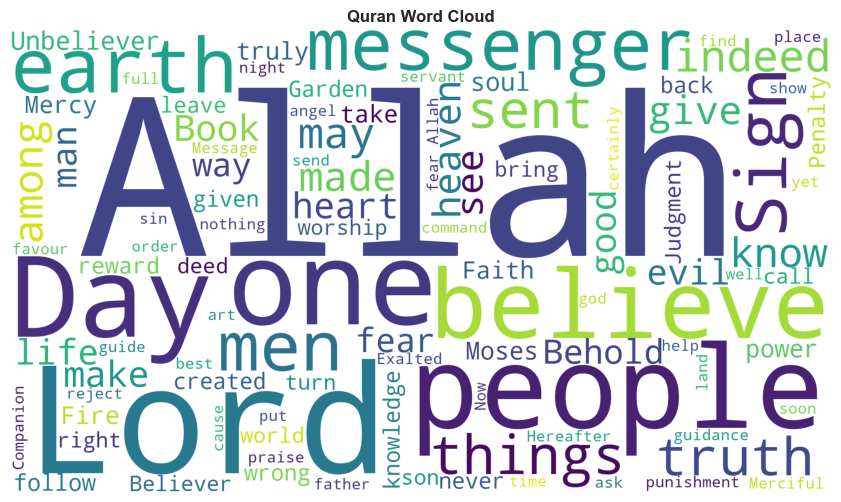

In [18]:
# Function for generating word cloud, it takes, a string, stopwords list, title for the image, maxwords to show
def word_cloud_generator(text_corpus, stopwords, title, maxwords):
    word_cloud = WordCloud( background_color='white', stopwords=stopwords, height=1080, width=1920, max_words=maxwords)
    word_cloud.generate(text_corpus)

    plt.figure(figsize=( 12,6))
    plt.imshow(word_cloud)
    plt.title(title, fontweight='bold', fontsize=12)
    plt.axis('off')
    plt.show()

# Collected some stopwords from the English Quran and updating it in STOPWORDS set
quranic_stop_words = ['ye', 'verily', 'will', 'said', 'say', 'us', 'thy', 'thee', 'O', 'except', 'Nay',
                      'thou' ,'hath', 'Thus', 'none', 'therein', 'come', 'came', 'even', 'two', 'word',
                      'every', 'let', 'thing', 'with', 'whose', 'forth', 'wouldst', 'set', 'unto']
stopwords = STOPWORDS.update(quranic_stop_words)


# Extracting each verse and storing them in a string
quran_text = ""
for lab,row in quran_english.iterrows():
    quran_text += row['Text']

word_cloud_generator(quran_text, stopwords, 'Quran Word Cloud', 100)

- You can see the words which are more frequent and have more emphasis

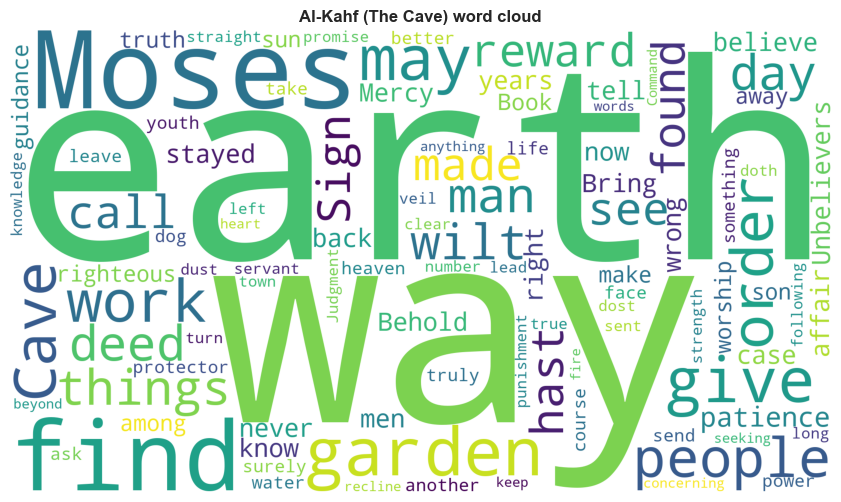

In [19]:
# Subsetting 18 Surah from the Quran dataframe
surah_kahf = quran_english_with_surah[quran_english_with_surah['Surah'] == 18]

# Concating each verse in a string
surah_kahf_text = ""
for lab,row in surah_kahf.iterrows():
    surah_kahf_text += row['Text']
    
stopwords2 = list(STOPWORDS) + ['Allah', 'Lord', 'one', 'best']
word_cloud_generator(surah_kahf_text, stopwords2, 'Al-Kahf (The Cave) word cloud', 100)

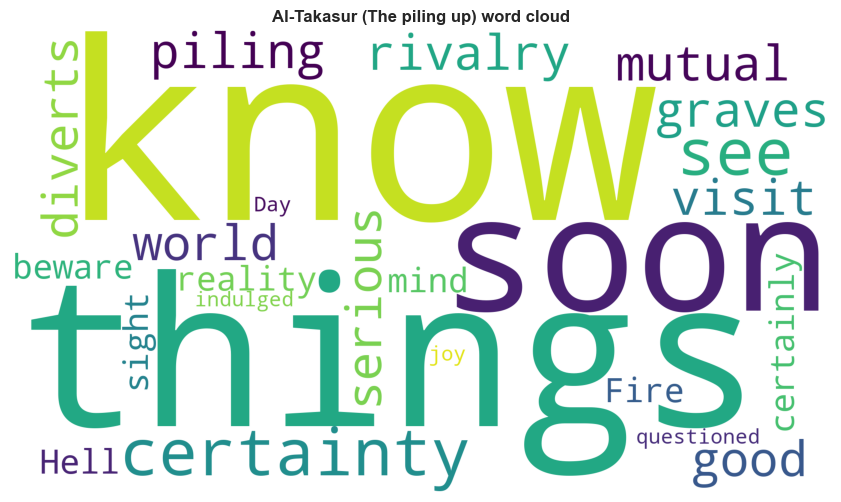

In [20]:
surah_takasur = quran_english_with_surah[quran_english_with_surah['Surah'] == 102]

surah_takasur_text = ""
for lab,row in surah_takasur.iterrows():
    surah_takasur_text += row['Text']
    
word_cloud_generator(surah_takasur_text, stopwords, 'Al-Takasur (The piling up) word cloud', 50)

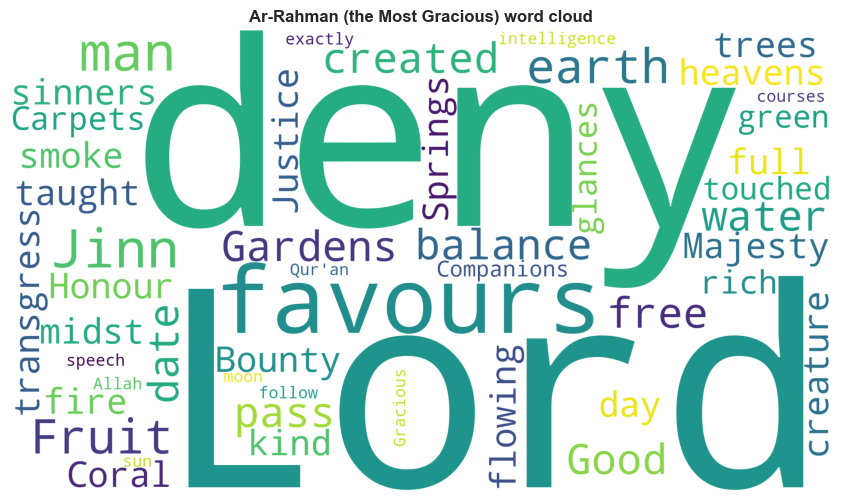

In [21]:
surah_rahman = quran_english_with_surah[quran_english_with_surah['Surah'] == 55]

surah_rahman_text = ""
for lab,row in surah_rahman.iterrows():
    surah_rahman_text += row['Text']
    
word_cloud_generator(surah_rahman_text, stopwords,'Ar-Rahman (the Most Gracious) word cloud', 50)

# Important things which Quran has emphasized more on.

In [22]:
# List of terms
terms_list = [ 'prayer', 'charity', 'justice', 'peace', 'patience', 'world', 'heaven', 'forgive', 'wisdom', 'hereafter']

# Making a dictionary of terms with value 0 initially
terms_list_freq = {}
for term in terms_list:
    terms_list_freq[term] = 0

# Code for counting the matched words and incrementing the count
for lab,row in quran_english.iterrows():
    ayat_word_list = row['Text'].split(' ')
    for word in ayat_word_list:
        word = word.lower()
        pattern = re.compile('[^a-zA-Z]') 
        word = pattern.sub('', word)
        for term in terms_list_freq:
            if word == term:
                terms_list_freq[word] += 1
            elif word.__contains__(term):
                terms_list_freq[term] += 1

# Make a dataframe from the dictionary
terms_df = pd.DataFrame({'Term' : terms_list_freq.keys(),
                         'Freq' : terms_list_freq.values()})

# Capitialize all term names
terms_df['Term'] = terms_df['Term'].apply(str.capitalize)
    

/var/folders/d_/803l9l6d6ts252dblcg86snh0000gp/T/ipykernel_29533/3813272518.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=terms_df, x='Term', y='Freq',palette='crest_r')


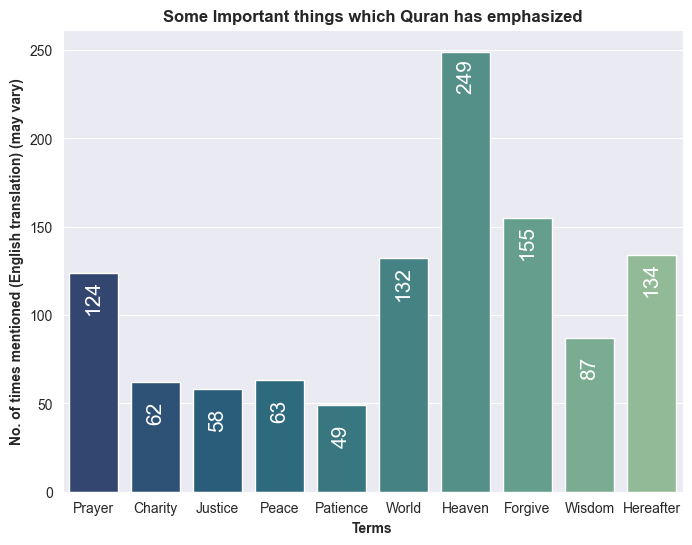

In [23]:
# Plotting the graph
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
ax = sns.barplot(data=terms_df, x='Term', y='Freq',palette='crest_r')

for container in ax.containers:
    ax.bar_label(container, size=15, padding=-30, color='white', rotation=90)
    
ax.set_title("Some Important things which Quran has emphasized", fontweight='bold', fontsize=12)
ax.set_ylabel("No. of times mentioned (English translation) (may vary)", fontweight='bold')
ax.set_xlabel("Terms", fontweight='bold')
    
plt.show()

- Quran has emphasized on the topics which are necessary for the betterment of the society and one’s life. 

In [24]:
terms_list = ['injustice', 'oppress', 'adultery', 'hell', 'satan', 'wrongdoing', 'resurrection', 'hypocrite', 'liar', 'greed']

terms_list_freq = {}

for term in terms_list:
    terms_list_freq[term] = 0
    
for lab,row in quran_english.iterrows():
    ayat_word_list = row['Text'].split(' ')
    for word in ayat_word_list:
        word = word.lower()
        pattern = re.compile('[^a-zA-Z]') 
        word = pattern.sub('', word)
        for term in terms_list_freq:
            if word == term:
                terms_list_freq[word] += 1
            elif word.__contains__(term):
                terms_list_freq[term] += 1

terms2_df = pd.DataFrame({'Term' : terms_list_freq.keys(),
                         'Freq' : terms_list_freq.values()})

terms2_df['Term'] = terms2_df['Term'].apply(str.capitalize)  
    

/var/folders/d_/803l9l6d6ts252dblcg86snh0000gp/T/ipykernel_29533/3443104450.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=terms2_df, x='Term', y='Freq',palette='rocket')


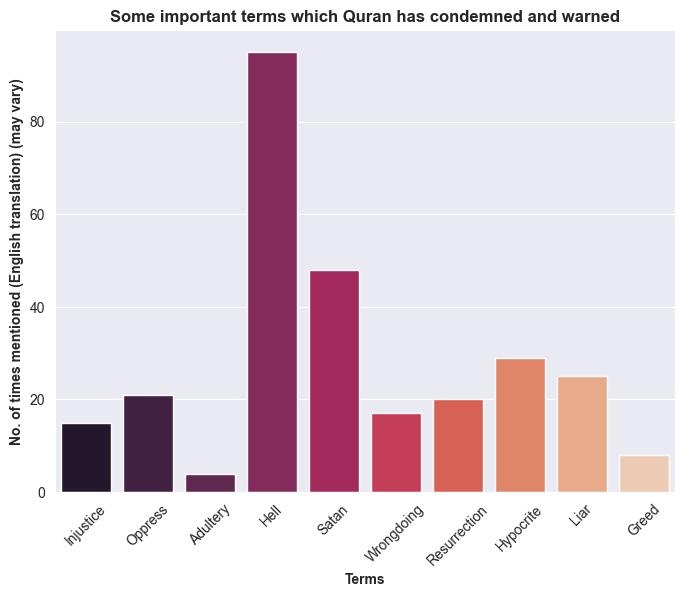

In [25]:
# Plotting the graph
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
ax = sns.barplot(data=terms2_df, x='Term', y='Freq',palette='rocket')
    
ax.set_title("Some important terms which Quran has condemned and warned", fontweight='bold', fontsize=12)
ax.set_ylabel("No. of times mentioned (English translation) (may vary)", fontweight='bold')
ax.set_xlabel("Terms", fontweight='bold')
ax.tick_params('x', rotation=45)
    
plt.show()

- There are many acts and harmful deeds which Quran has condemned and warned about their consequences.

# **All uptill now!** Please contribute more in it.

In [26]:
quran_english_with_surah

,Surah,Ayah,Text,Surah Name
1,1,1,"In the name of Allah, Most Gracious, Most Merc...",Al-Fatihah (the Opening)
2,1,2,"Praise be to Allah, the Cherisher and Sustaine...",Al-Fatihah (the Opening)
3,1,3,"Most Gracious, Most Merciful;",Al-Fatihah (the Opening)
4,1,4,Master of the Day of Judgment.,Al-Fatihah (the Opening)
5,1,5,"Thee do we worship, and Thine aid we seek.",Al-Fatihah (the Opening)
...,...,...,...,...
6232,114,2,"The King (or Ruler) of Mankind,",An-Nas (Mankind)
6233,114,3,"The god (or judge) of Mankind,-",An-Nas (Mankind)
6234,114,4,"From the mischief of the Whisperer (of Evil), ...",An-Nas (Mankind)
6235,114,5,(The same) who whispers into the hearts of Man...,An-Nas (Mankind)


In [27]:
ayah_count_per_surah = quran_english_with_surah.groupby('Surah Name')['Ayah'].count()
sorted_ayah_count_per_surah = ayah_count_per_surah.sort_values(ascending=False)

In [28]:

desc_stats = sorted_ayah_count_per_surah.describe()
desc_stats

count    114.000000
mean      54.701754
std       53.213367
min        3.000000
25%       15.500000
50%       39.000000
75%       77.750000
max      286.000000
Name: Ayah, dtype: float64

/var/folders/d_/803l9l6d6ts252dblcg86snh0000gp/T/ipykernel_29533/3675723235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_ayah_count_per_surah.index, y=sorted_ayah_count_per_surah.values, palette='viridis')


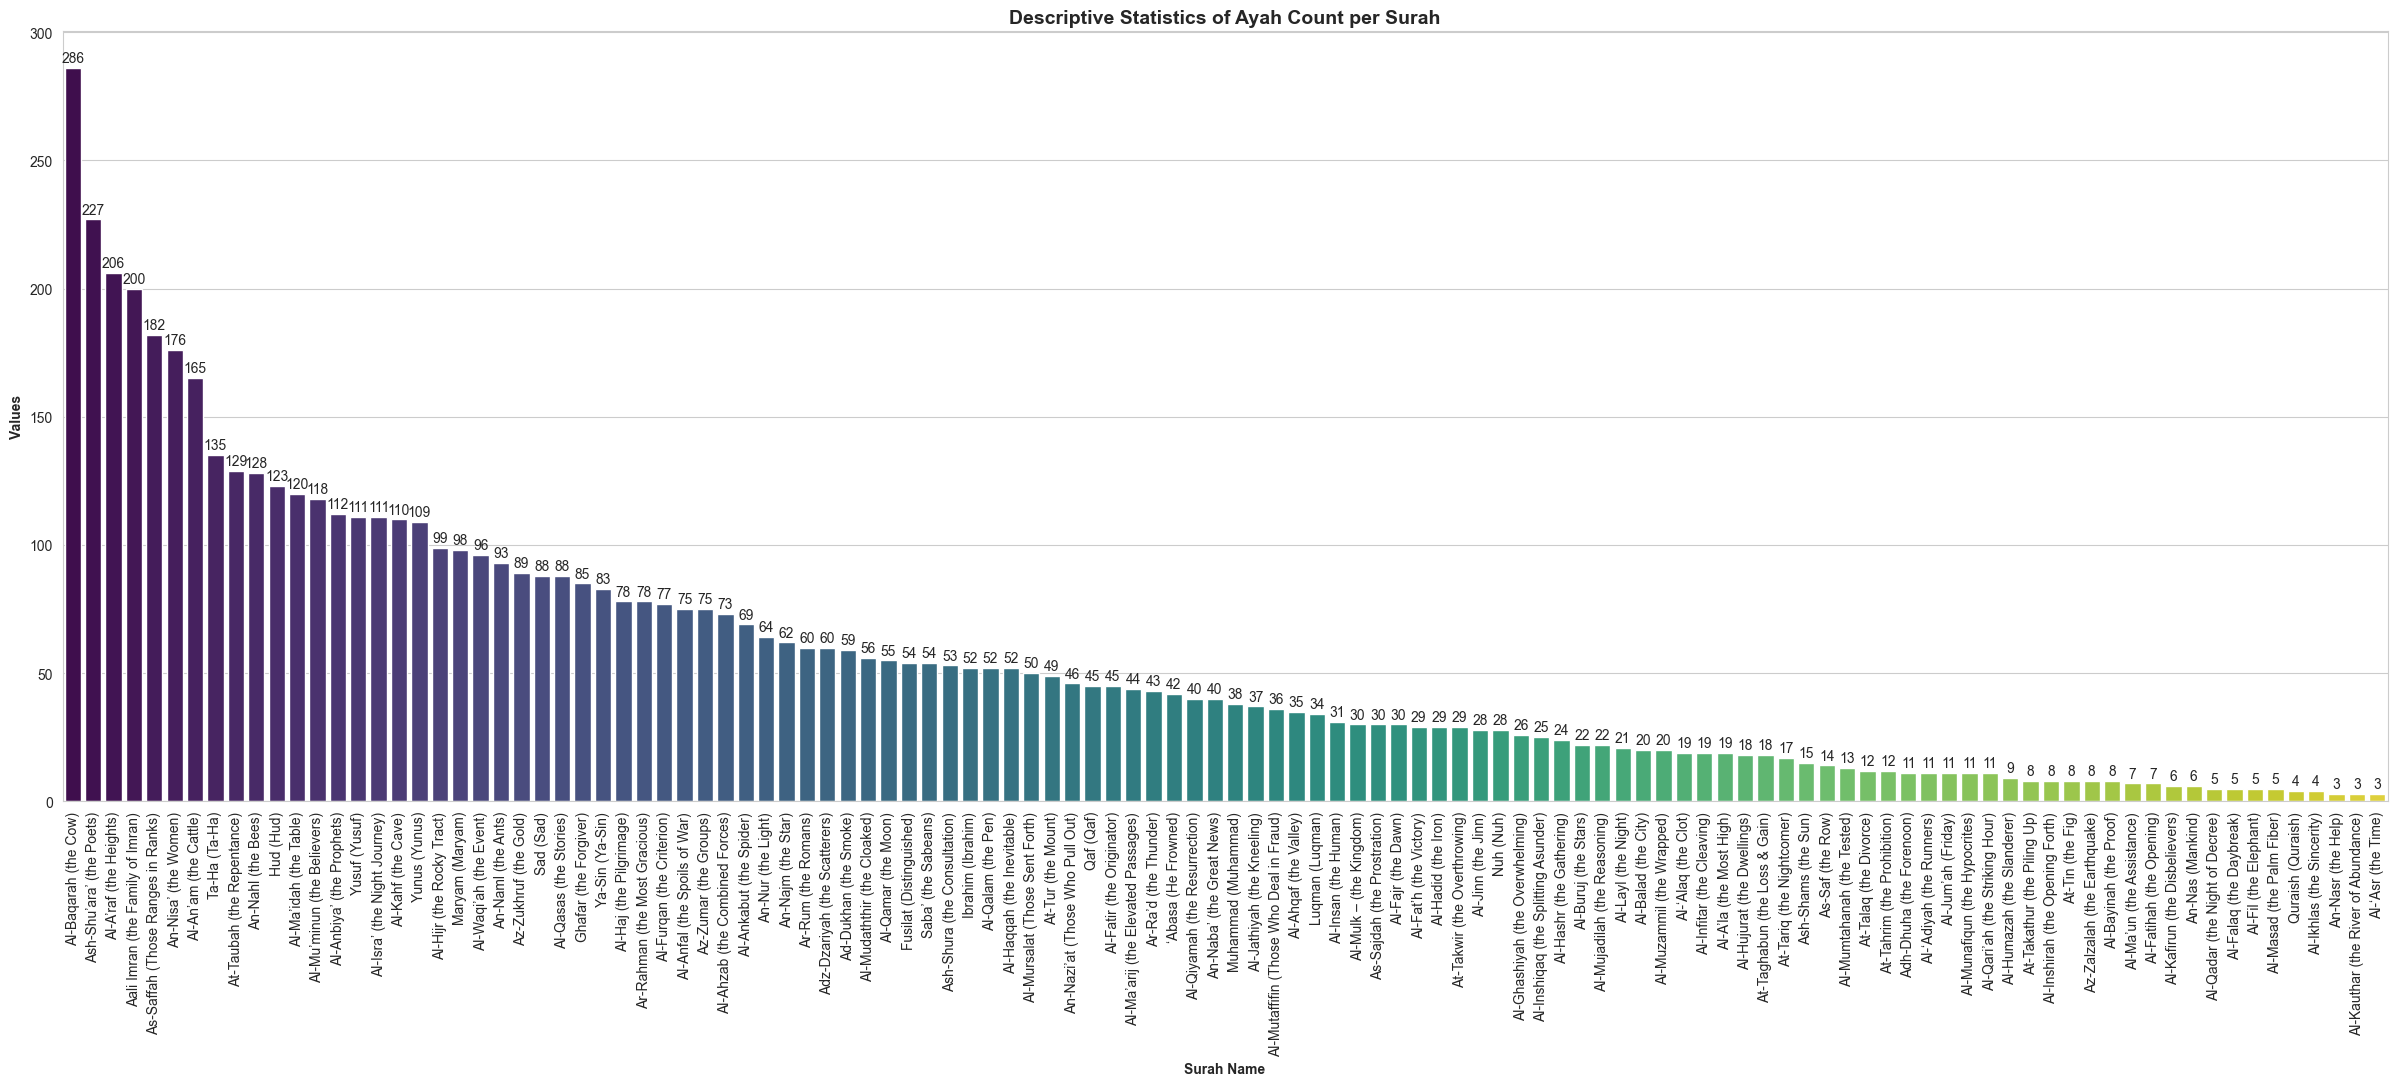

In [29]:
plt.figure(figsize=(30, 10))  # Adjust the figure size
sns.set_style('whitegrid')
ax = sns.barplot(x=sorted_ayah_count_per_surah.index, y=sorted_ayah_count_per_surah.values, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, size=10, padding=2)

ax.set_title('Descriptive Statistics of Ayah Count per Surah', fontweight='bold', fontsize=14)
ax.set_ylabel('Values', fontweight='bold')
ax.set_xlabel('Surah Name', fontweight='bold')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

/var/folders/d_/803l9l6d6ts252dblcg86snh0000gp/T/ipykernel_29533/2585780673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_ayah_count_per_surah.index, y=sorted_ayah_count_per_surah.values, palette='viridis')


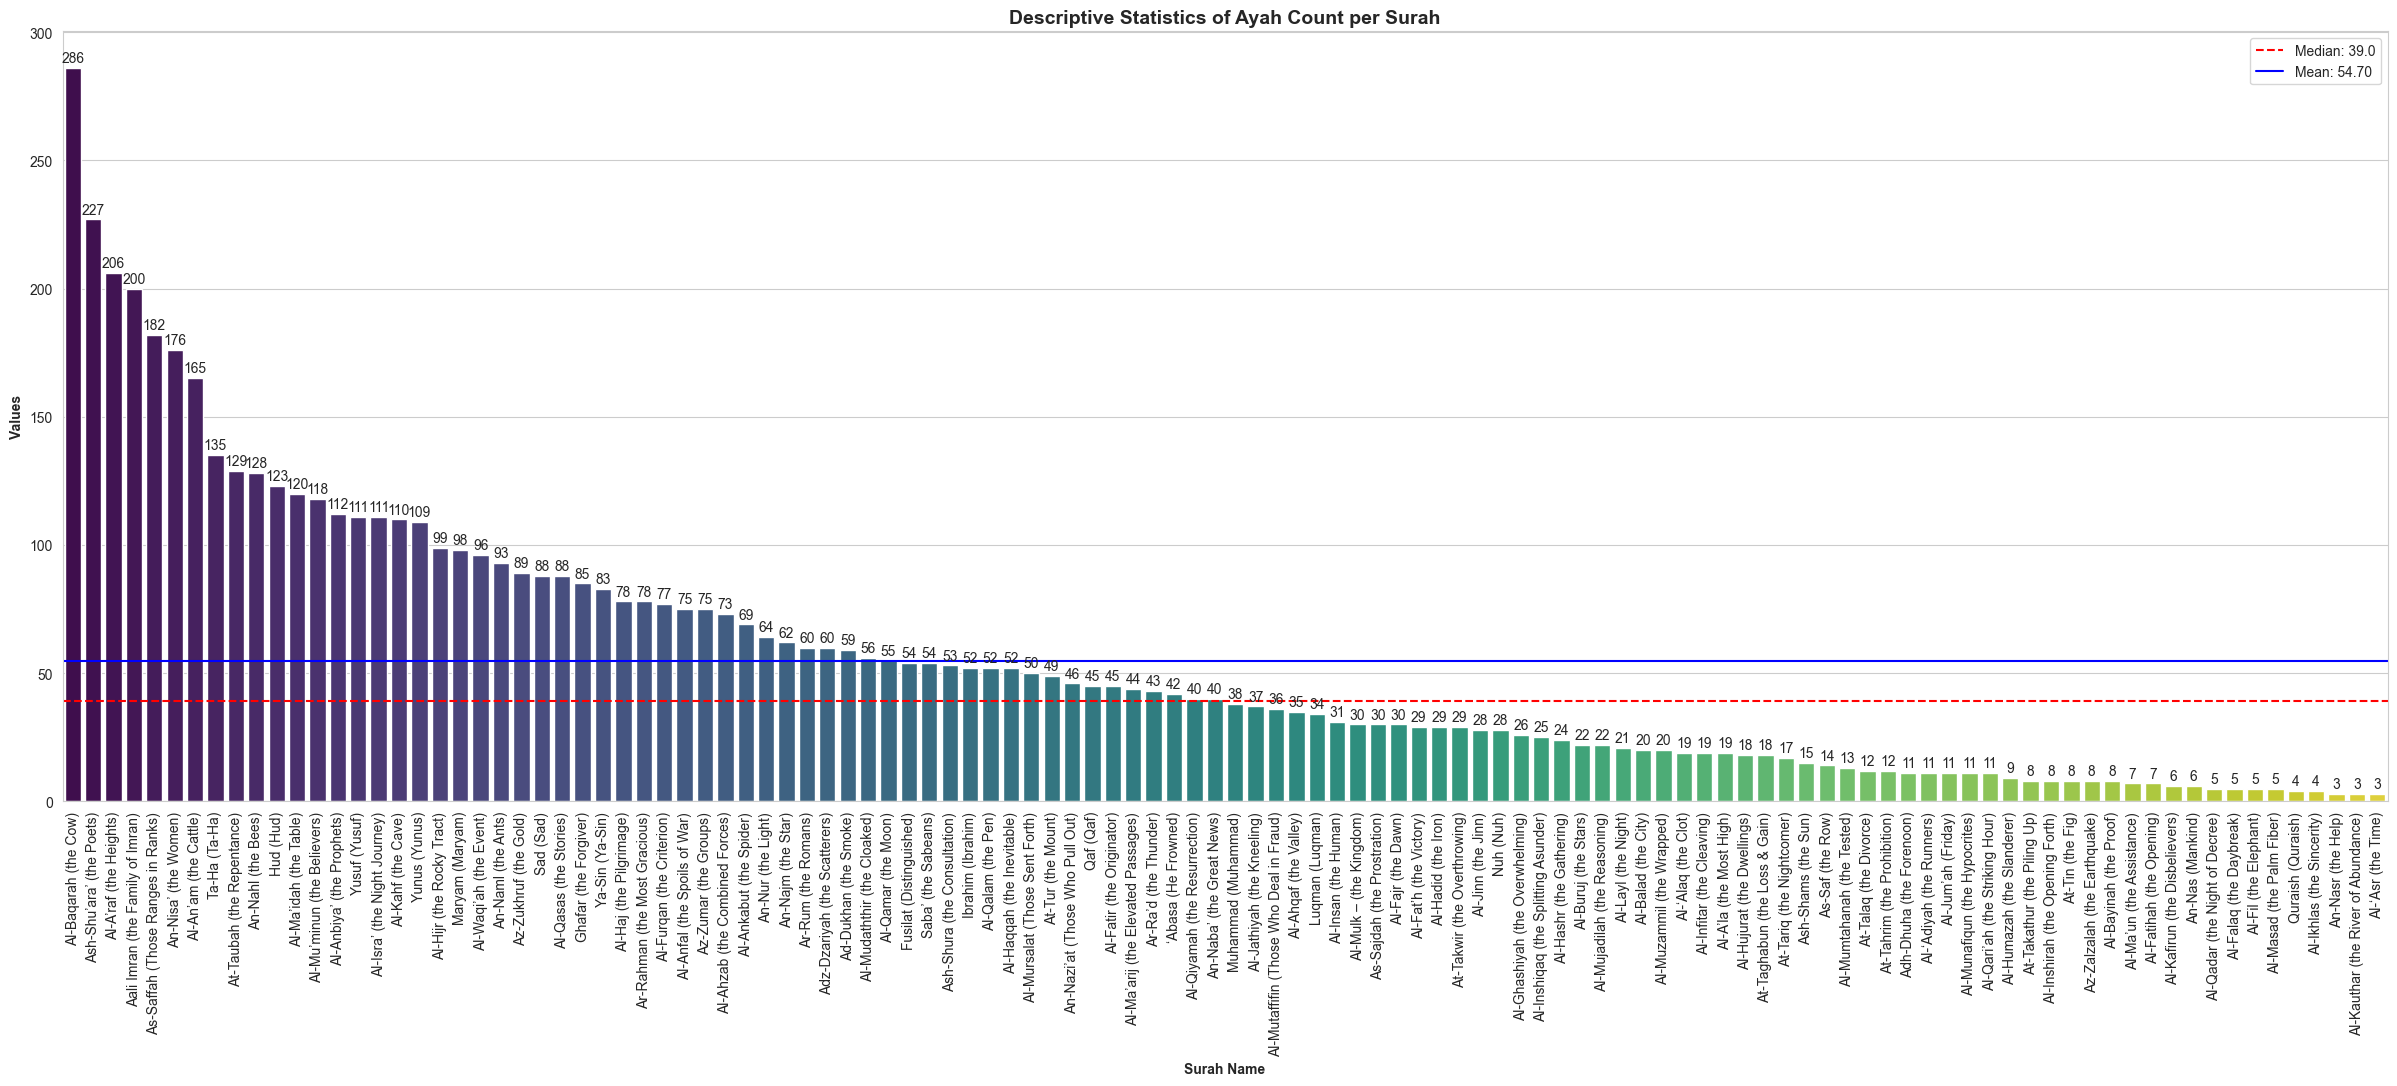

In [30]:
plt.figure(figsize=(30, 10))  # Adjust the figure size
sns.set_style('whitegrid')
ax = sns.barplot(x=sorted_ayah_count_per_surah.index, y=sorted_ayah_count_per_surah.values, palette='viridis')

# Adding median and average lines
median_value = sorted_ayah_count_per_surah.median()
mean_value = sorted_ayah_count_per_surah.mean()

plt.axhline(median_value, color='r', linestyle='--', label=f'Median: {median_value}')
plt.axhline(mean_value, color='b', linestyle='-', label=f'Mean: {mean_value:.2f}')

for container in ax.containers:
    ax.bar_label(container, size=10, padding=2)

ax.set_title('Descriptive Statistics of Ayah Count per Surah', fontweight='bold', fontsize=14)
ax.set_ylabel('Values', fontweight='bold')
ax.set_xlabel('Surah Name', fontweight='bold')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

/var/folders/d_/803l9l6d6ts252dblcg86snh0000gp/T/ipykernel_29533/3514079580.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=sorted_ayah_count_per_surah.values, palette='viridis')


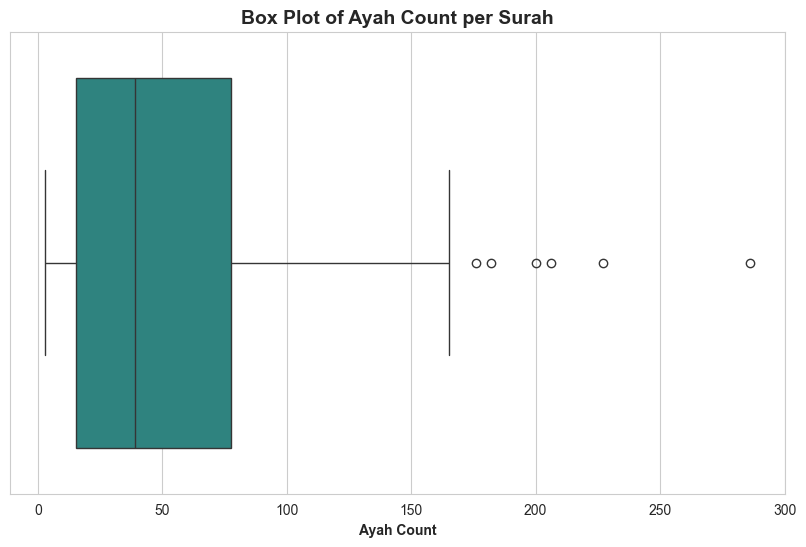

In [31]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
ax = sns.boxplot(x=sorted_ayah_count_per_surah.values, palette='viridis')

ax.set_title('Box Plot of Ayah Count per Surah', fontweight='bold', fontsize=14)
ax.set_xlabel('Ayah Count', fontweight='bold')

plt.show()

## Genearating the inverted Index 

In [32]:
quran_english_with_surah.head()

,Surah,Ayah,Text,Surah Name
1,1,1,"In the name of Allah, Most Gracious, Most Merc...",Al-Fatihah (the Opening)
2,1,2,"Praise be to Allah, the Cherisher and Sustaine...",Al-Fatihah (the Opening)
3,1,3,"Most Gracious, Most Merciful;",Al-Fatihah (the Opening)
4,1,4,Master of the Day of Judgment.,Al-Fatihah (the Opening)
5,1,5,"Thee do we worship, and Thine aid we seek.",Al-Fatihah (the Opening)


In [33]:
last_surah_number = None

for index, row in quran_english_with_surah.iterrows():
    if row['Surah'] != last_surah_number:
        print("==============================")
        print(f"Surah Number: {row['Surah']}, Surah Name: {row['Surah Name']}")
        last_surah_number = row['Surah']
        print("Text: ", end="")
    print(f"{row['Text']}")
    break  # Remove this line if you want to print all rows

Surah Number: 1, Surah Name: Al-Fatihah (the Opening)
Text: In the name of Allah, Most Gracious, Most Merciful.


In [34]:
ayah_count_per_surah = quran_english_with_surah.groupby(['Surah', 'Surah Name']).size().reset_index(name='Ayah Count')
ayah_count_df = pd.DataFrame(ayah_count_per_surah)
ayah_count_df

,Surah,Surah Name,Ayah Count
0,1,Al-Fatihah (the Opening),7
1,2,Al-Baqarah (the Cow),286
2,3,Aali Imran (the Family of Imran),200
3,4,An-Nisa’ (the Women),176
4,5,Al-Ma’idah (the Table),120
...,...,...,...
109,110,An-Nasr (the Help),3
110,111,Al-Masad (the Palm Fiber),5
111,112,Al-Ikhlas (the Sincerity),4
112,113,Al-Falaq (the Daybreak),5


In [35]:
# Function to count words in a text
def word_count(text):
    return len(text.split())

# Adding a new column 'Word Count' to the dataframe
quran_english_with_surah['Word Count'] = quran_english_with_surah['Text'].apply(word_count)

# Grouping by 'Surah' and 'Surah Name' to get the total word count per Surah
word_count_per_surah = quran_english_with_surah.groupby(['Surah', 'Surah Name'])['Word Count'].sum().reset_index()

# Merging the word count with the ayah count dataframe
ayah_count_df = ayah_count_df.merge(word_count_per_surah, on=['Surah', 'Surah Name'])

ayah_count_df

,Surah,Surah Name,Ayah Count,Word Count
0,1,Al-Fatihah (the Opening),7,66
1,2,Al-Baqarah (the Cow),286,12409
2,3,Aali Imran (the Family of Imran),200,7263
3,4,An-Nisa’ (the Women),176,7366
4,5,Al-Ma’idah (the Table),120,5796
...,...,...,...,...
109,110,An-Nasr (the Help),3,38
110,111,Al-Masad (the Palm Fiber),5,53
111,112,Al-Ikhlas (the Sincerity),4,26
112,113,Al-Falaq (the Daybreak),5,45


Correlation between Ayah count and Word count: 0.8926093958371868


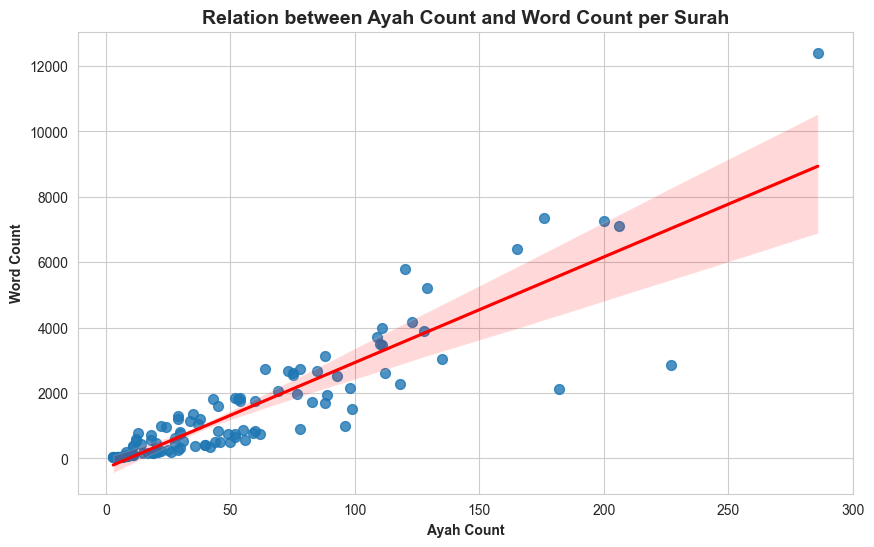

In [36]:
# Calculate the correlation between Ayah count and Word count
correlation = ayah_count_df['Ayah Count'].corr(ayah_count_df['Word Count'])
print(f"Correlation between Ayah count and Word count: {correlation}")

# Plotting the relationship with a regression line
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
ax = sns.regplot(data=ayah_count_df, x='Ayah Count', y='Word Count', scatter_kws={'s': 50}, line_kws={'color': 'red'})

ax.set_title('Relation between Ayah Count and Word Count per Surah', fontweight='bold', fontsize=14)
ax.set_xlabel('Ayah Count', fontweight='bold')
ax.set_ylabel('Word Count', fontweight='bold')

plt.show()

In [37]:
# Calculate the average number of words per ayah
ayah_count_df['Average Words per Ayah'] = ayah_count_df['Word Count'] / ayah_count_df['Ayah Count']

# Display the dataframe with the new column
ayah_count_df

,Surah,Surah Name,Ayah Count,Word Count,Average Words per Ayah
0,1,Al-Fatihah (the Opening),7,66,9.428571
1,2,Al-Baqarah (the Cow),286,12409,43.388112
2,3,Aali Imran (the Family of Imran),200,7263,36.315000
3,4,An-Nisa’ (the Women),176,7366,41.852273
4,5,Al-Ma’idah (the Table),120,5796,48.300000
...,...,...,...,...,...
109,110,An-Nasr (the Help),3,38,12.666667
110,111,Al-Masad (the Palm Fiber),5,53,10.600000
111,112,Al-Ikhlas (the Sincerity),4,26,6.500000
112,113,Al-Falaq (the Daybreak),5,45,9.000000


/var/folders/d_/803l9l6d6ts252dblcg86snh0000gp/T/ipykernel_29533/1327139136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=word_count_per_surah['Surah Name'], y=word_count_per_surah['Word Count'], palette='viridis')


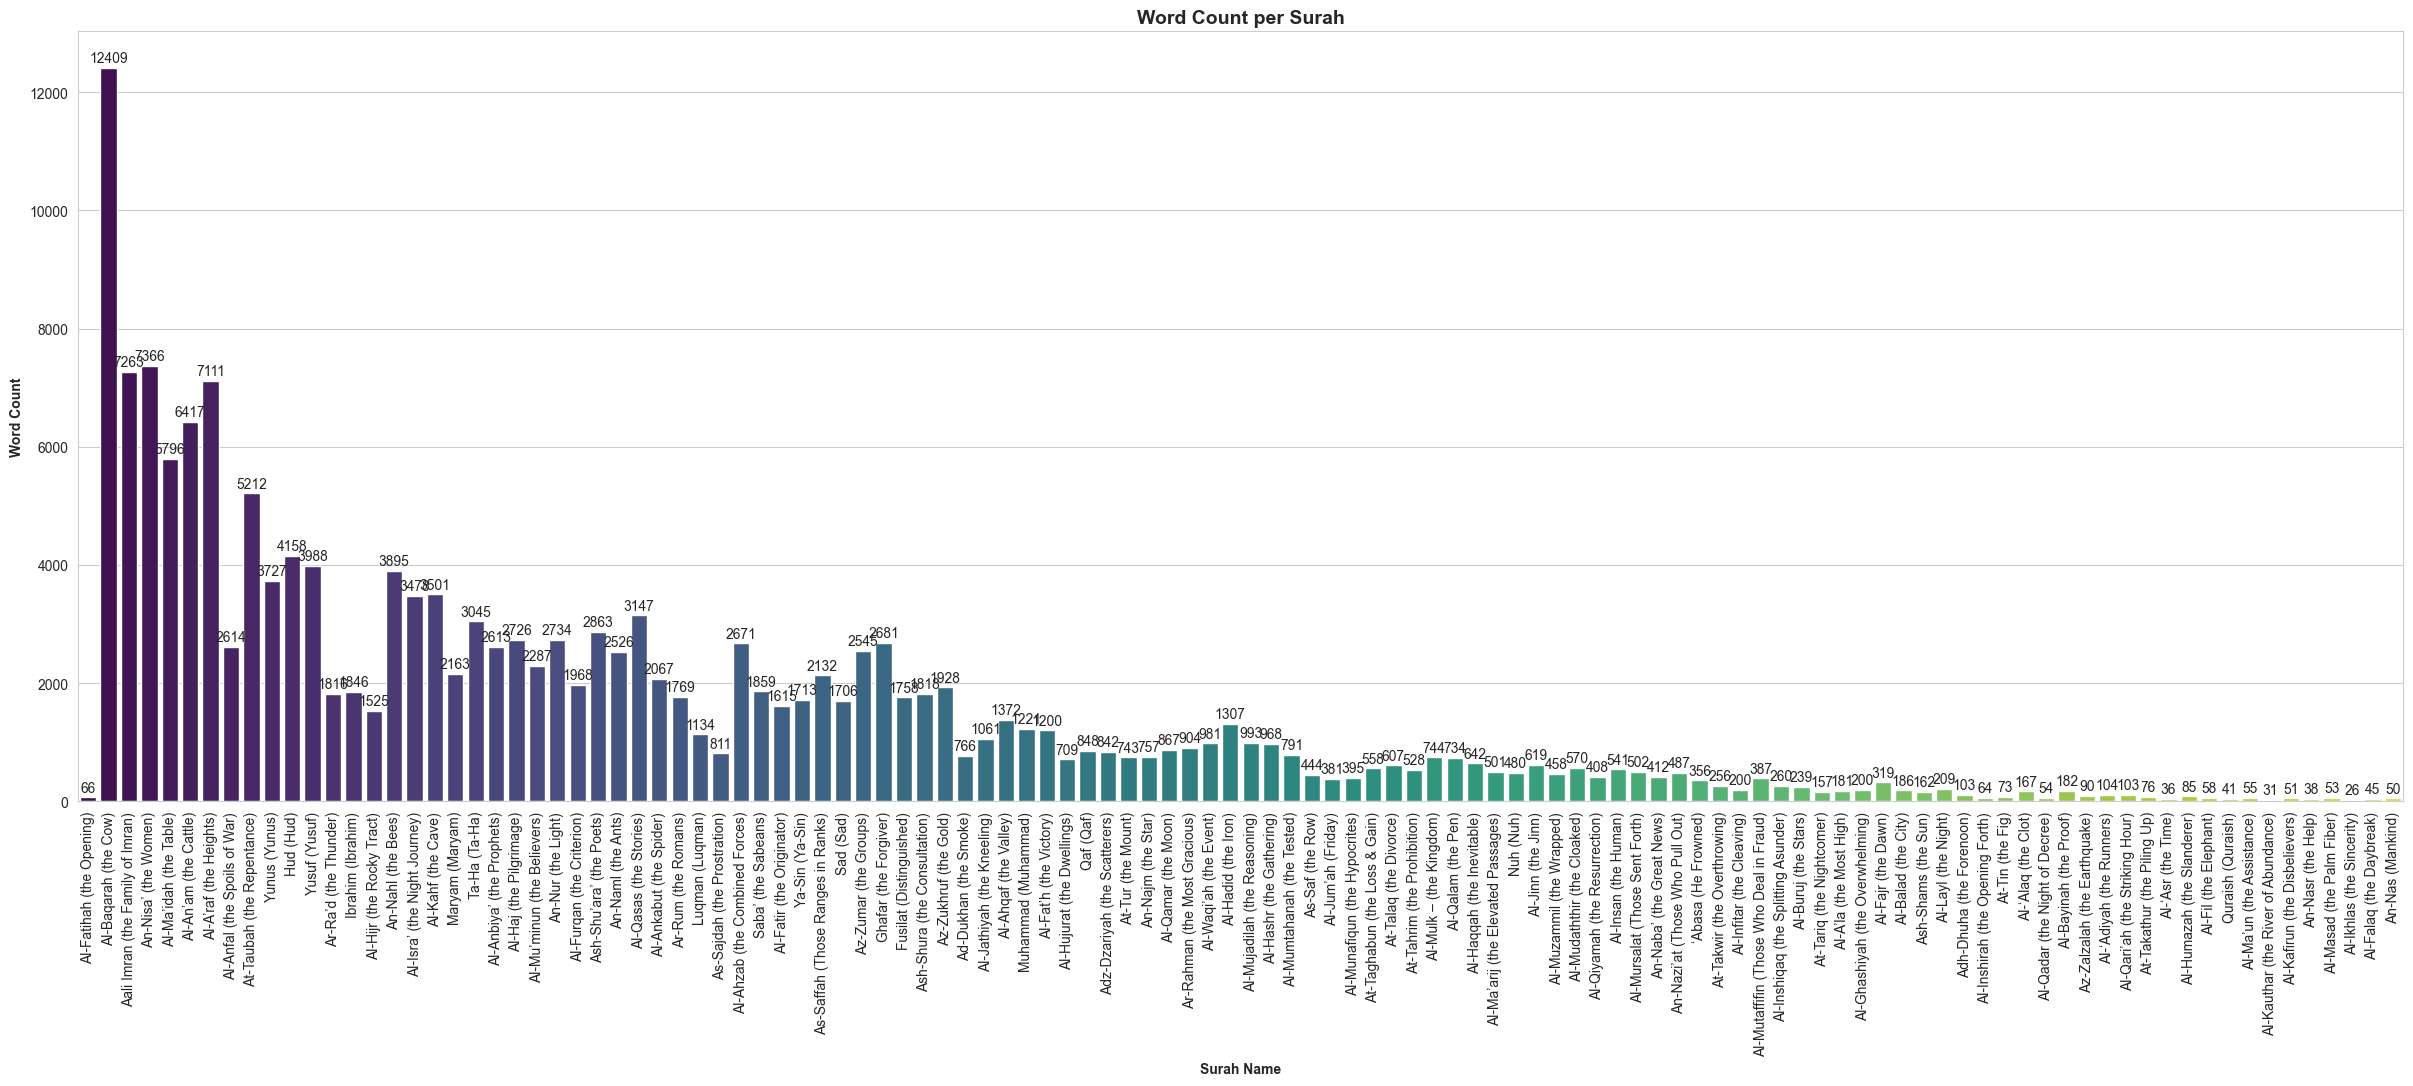

In [38]:
plt.figure(figsize=(30, 10))  # Adjust the figure size
sns.set_style('whitegrid')
ax = sns.barplot(x=word_count_per_surah['Surah Name'], y=word_count_per_surah['Word Count'], palette='viridis')

for container in ax.containers:
    ax.bar_label(container, size=10, padding=2)

ax.set_title('Word Count per Surah', fontweight='bold', fontsize=14)
ax.set_ylabel('Word Count', fontweight='bold')
ax.set_xlabel('Surah Name', fontweight='bold')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [39]:
from collections import defaultdict

# Function to create an inverted index
def create_inverted_index(dataframe):
    inverted_index = defaultdict(list)
    
    for index, row in dataframe.iterrows():
        words = row['Text'].split()
        for word in words:
            word = re.sub(r'\W+', '', word).lower()  # Remove punctuation and convert to lowercase
            if word:  # Ensure the word is not empty
                inverted_index[word].append((row['Surah'], row['Ayah']))
    
    return inverted_index

# Create the inverted index
inverted_index = create_inverted_index(quran_english_with_surah)

# Display a sample of the inverted index
for word in list(inverted_index.keys())[:10]:
    print(f"{word}: {inverted_index[word]}")

in: [(1, 1), (2, 2), (2, 3), (2, 3), (2, 4), (2, 4), (2, 8), (2, 10), (2, 15), (2, 17), (2, 19), (2, 19), (2, 19), (2, 23), (2, 25), (2, 28), (2, 32), (2, 32), (2, 35), (2, 36), (2, 41), (2, 43), (2, 43), (2, 46), (2, 51), (2, 54), (2, 54), (2, 54), (2, 55), (2, 58), (2, 58), (2, 62), (2, 62), (2, 65), (2, 69), (2, 71), (2, 74), (2, 75), (2, 76), (2, 76), (2, 81), (2, 83), (2, 83), (2, 85), (2, 85), (2, 85), (2, 89), (2, 90), (2, 90), (2, 91), (2, 91), (2, 91), (2, 102), (2, 110), (2, 110), (2, 113), (2, 114), (2, 114), (2, 114), (2, 114), (2, 114), (2, 116), (2, 118), (2, 119), (2, 125), (2, 126), (2, 128), (2, 129), (2, 129), (2, 130), (2, 130), (2, 130), (2, 132), (2, 133), (2, 134), (2, 136), (2, 136), (2, 137), (2, 139), (2, 139), (2, 141), (2, 144), (2, 144), (2, 145), (2, 147), (2, 148), (2, 149), (2, 150), (2, 151), (2, 151), (2, 151), (2, 154), (2, 155), (2, 158), (2, 158), (2, 159), (2, 164), (2, 164), (2, 164), (2, 164), (2, 164), (2, 164), (2, 165), (2, 174), (2, 175), (2, 

In [53]:
from IPython.display import display, HTML

def search_keyword(keyword, inverted_index, quran_english_with_surah):
    """
    Search for a keyword and display Surah name, verse details and text with highlighted keyword
    
    Args:
        keyword (str): Word to search (case-insensitive)
        inverted_index (dict): Inverted index dictionary containing lists of verse_id tuples
        quran_english_with_surah (DataFrame): Quran DataFrame with surah and verse information
    """
    if keyword.lower() not in inverted_index:
        print(f"No occurrences found for '{keyword}'")
        return
        
    print(f"\nSearching for: '{keyword}'\n")
    print("-" * 80)
    
    # Get the list of verse_ids where the keyword appears
    verse_ids = inverted_index[keyword.lower()]
    
    for verse_id in verse_ids:
        # Verse ID is now a tuple of (surah_num, verse_num)
        surah_num, verse_num = verse_id
        verse_data = quran_english_with_surah[(quran_english_with_surah['Surah'] == surah_num) & 
                             (quran_english_with_surah['Ayah'] == verse_num)]
        
        surah_name = verse_data['Surah Name'].iloc[0]
        verse_text = verse_data['Text'].iloc[0]
        
        # Highlight the keyword in the verse text
        highlighted_text = re.sub(f"(?i)({keyword})", r'<mark>\1</mark>', verse_text)
        
        # Count occurrences in the verse text
        freq = len([word for word in verse_text.lower().split() if word == keyword.lower()])
        
        display(HTML(f"""
        <div>
            <strong>Surah:</strong> {surah_name}<br>
            <strong>Reference:</strong> {surah_num}:{verse_num}<br>
            <strong>Occurrences in verse:</strong> {freq}<br>
            <strong>Text:</strong> {highlighted_text}<br>
        </div>
        <hr>
        """))

# Example usage
keyword = "shuaib"  # You can change this to search for any word
search_keyword(keyword, inverted_index, quran_english_with_surah)


Searching for: 'shuaib'

--------------------------------------------------------------------------------


In [61]:
keyword = "modesty"  # You can change this to search for any word
search_keyword(keyword, inverted_index, quran_english_with_surah)


Searching for: 'modesty'

--------------------------------------------------------------------------------


In [80]:
keyword = input("Enter a keyword to search: ")
search_keyword(keyword, inverted_index, quran_english_with_surah)



Searching for: 'divide'

--------------------------------------------------------------------------------


4

In [81]:
!wget https://cdn-media.huggingface.co/frpc-gradio-0.3/frpc_darwin_arm64 -O frpc_darwin_arm64_v0.3
!mv frpc_darwin_arm64_v0.3 /Users/salam9/.pyenv/versions/3.12.1/lib/python3.12/site-packages/gradio

--2025-03-08 01:39:14--  https://cdn-media.huggingface.co/frpc-gradio-0.3/frpc_darwin_arm64
Resolving cdn-media.huggingface.co (cdn-media.huggingface.co)... 18.66.41.119, 18.66.41.62, 18.66.41.93, ...
Connecting to cdn-media.huggingface.co (cdn-media.huggingface.co)|18.66.41.119|:443... connected.
HTTP request sent, awaiting response... 503 Service Unavailable
2025-03-08 01:39:14 ERROR 503: Service Unavailable.

